##### $\hspace{15pt}$ **Filename: dominanceAnalysis.ipynb**
##### $\hspace{1.5pt}$ **Date Created: January 3, 2024**
##### **Date Modified: January 6, 2024**
##### $\rule{10.5in}{1pt}$
##### **Determine the relative importance of predictors using [dominance analysis](https://dominance-analysis.github.io/dominance-analysis/) when fitting a multiple regression model to the [insurance premium prediction dataset](https://www.kaggle.com/datasets/noordeen/insurance-premium-prediction?resource=download) from Kaggle to predict expenses. Restart the runtime after installing the packages and before running the remaining cells of the notebook.**

##### $\rule{10.5in}{1pt}$

##### Install `dominance-analysis` and `dython`.

In [ ]:
!pip install dominance-analysis -q dython -q

##### Update `seaborn`.

In [ ]:
!pip install -U seaborn -q

##### Restart the runtime, and load modules and packages.

In [1]:
from dominance_analysis import Dominance
from dython.nominal import associations
from google.colab import drive
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

##### Set pandas dataframes to display non-truncated content of each column.

In [2]:
pd.set_option('display.max_colwidth', None)

##### Set the float format of pandas dataframes.

In [3]:
pd.options.display.float_format = "{:.4f}".format

##### Mount Google Drive to Colab.

In [4]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


##### Load the dataset from Google Drive.

In [5]:
path = "gdrive/MyDrive/Colab Notebooks/010_dominanceAnalysis/"
dataset = pd.read_csv(path + "insurance.csv")
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9000,0,yes,southwest,16884.9200
1,18,male,33.8000,1,no,southeast,1725.5500
2,28,male,33.0000,3,no,southeast,4449.4600
3,33,male,22.7000,0,no,northwest,21984.4700
4,32,male,28.9000,0,no,northwest,3866.8600


##### Check if there are missing values.

In [6]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

##### Visualize the continuous predictors in the dataset.

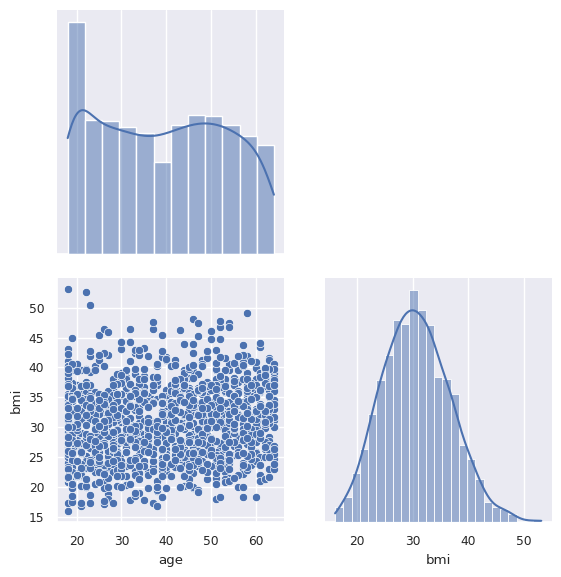

In [7]:
sns.set_style("white")
sns.set(font_scale = 0.8)
grid = sns.PairGrid(dataset, vars = ["age", "bmi"], corner = True, diag_sharey = False)
grid.fig.set_size_inches(6, 6)
grid.map_diag(sns.histplot, stat = "percent", kde = True)
grid.map_lower(sns.scatterplot)
plt.show()

##### Visualize the categorical and count predictors in the dataset.

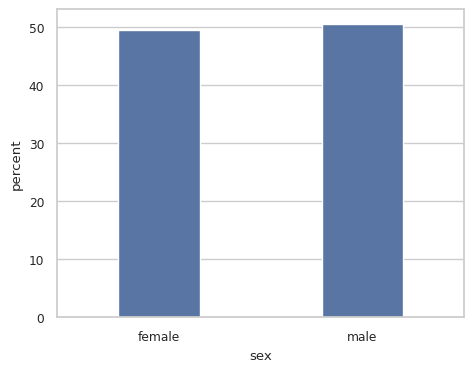

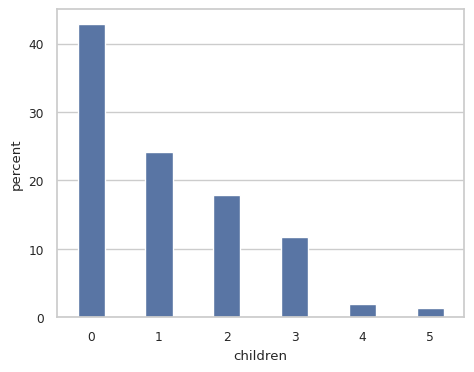

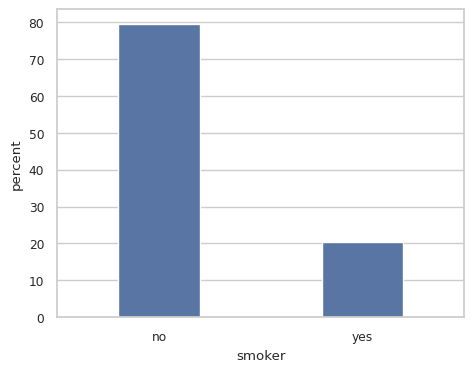

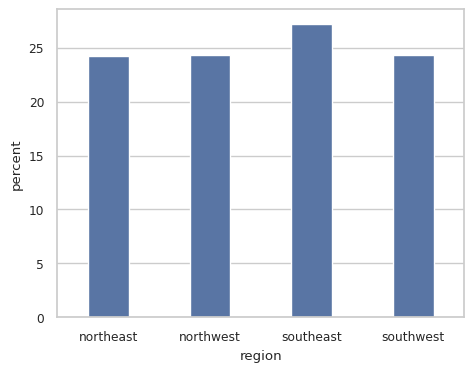

In [8]:
plt.rcParams["figure.figsize"] = [5.25, 4]
sns.set_style("whitegrid")

categoricalAndCountPredictors = ["sex", "children", "smoker", "region"]

for feature in categoricalAndCountPredictors:

    uniqueValues = dataset[feature].unique().tolist()
    uniqueValues.sort()
    sns.countplot(data = dataset, x = feature, order = uniqueValues, stat = "percent", width = 0.4)
    plt.show()

##### Visualize the target in the dataset.

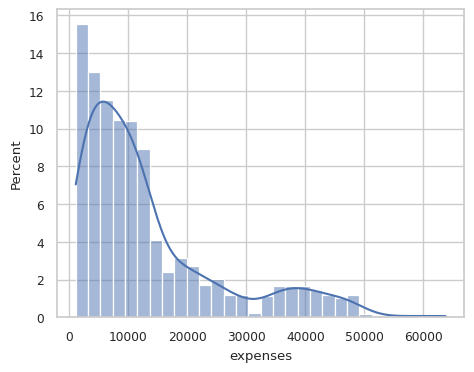

In [9]:
sns.histplot(data = dataset, x = "expenses", stat = "percent", kde = True)
plt.show()

##### Create a correlation heatmap.

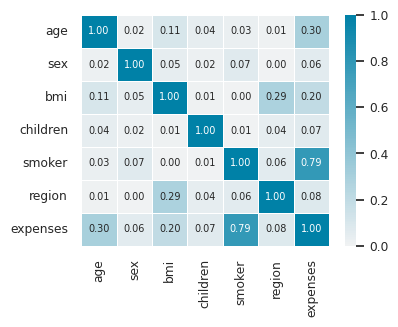

In [10]:
plt.figure(figsize = (4, 3))
sns.set(font_scale = 0.8)
correlationMatrix = associations(dataset, nominal_columns = ["sex", "smoker", "region"], compute_only = True)["corr"]
cmap = sns.diverging_palette(20, 230, s = 100, as_cmap = True)
sns.heatmap(correlationMatrix, cmap = cmap, center = 0, annot = True, annot_kws = {"fontsize": 7}, fmt = ".2f", linewidths = 0.5)
plt.show()

##### Build a one-hot encoding of each of the categorical predictors that are either not binary or are coded as strings.

---



In [11]:
dataset = pd.get_dummies(dataset, columns = ["sex", "smoker", "region"], drop_first = True)
dataset.head()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9000,0,16884.9200,0,1,0,0,1
1,18,33.8000,1,1725.5500,1,0,0,1,0
2,28,33.0000,3,4449.4600,1,0,0,1,0
3,33,22.7000,0,21984.4700,1,0,1,0,0
4,32,28.9000,0,3866.8600,1,0,1,0,0


##### Fit a multiple regression model to the dataset.

In [12]:
dominanceRegression = Dominance(data = dataset, target = 'expenses')

Selecting 8 Best Predictors for the Model
Selected Predictors :  ['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.7509284662058437



##### Build all possible subset models and calculate the incremental $R^2$ contribution of each predictor to the subset model of all other predictors.

In [13]:
dominanceRegression.incremental_rsquare()

Selecting 8 Best Predictors for the Model
Selected Predictors :  ['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']

Creating models for 255 possible combinations of 8 features :


100%|██████████| 8/8 [00:04<00:00,  1.75it/s]


#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################


100%|██████████| 7/7 [00:00<00:00, 48.18it/s]

#########################  Variable Dominance Calculation Done!!!!!  #########################



{'age': 0.0888994612837182,
 'bmi': 0.03184723364741268,
 'children': 0.0034221495550757607,
 'sex_male': 0.00158713132450922,
 'smoker_yes': 0.6212959321578935,
 'region_northwest': 0.0006676508736352357,
 'region_southeast': 0.002009801024367614,
 'region_southwest': 0.0011991063392316902}

##### Calculate the different types of dominance measures.

In [14]:
dominanceRegression.dominance_stats()

,Interactional Dominance,Individual Dominance,Average Partial Dominance,Total Dominance,Percentage Relative Importance
smoker_yes,0.6244,0.6198,0.6210,0.6213,82.7370
age,0.0873,0.0894,0.0891,0.0889,11.8386
bmi,0.0264,0.0394,0.0315,0.0318,4.2410
children,0.0022,0.0046,0.0034,0.0034,0.4557
region_southeast,0.0009,0.0055,0.0016,0.0020,0.2676
sex_male,0.0000,0.0033,0.0016,0.0016,0.2114
region_southwest,0.0008,0.0019,0.0012,0.0012,0.1597
region_northwest,0.0001,0.0016,0.0006,0.0007,0.0889


##### Plot the percentage relative importance waterfall.

In [15]:
dominanceRegression.plot_incremental_rsquare()

/usr/local/lib/python3.10/dist-packages/dominance_analysis/dominance.py:272: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



##### Determine each dominance level for each predictor.

In [16]:
dominanceRegression.dominance_level()

,Predictors,Generally Dominating,Conditionally Dominating,Completely Dominating
0,smoker_yes,"[age, bmi, children, region_southeast, sex_male, region_southwest, region_northwest]","[age, bmi, children, region_southeast, sex_male, region_southwest, region_northwest]","[age, bmi, children, region_southeast, sex_male, region_southwest, region_northwest]"
1,age,"[bmi, children, region_southeast, sex_male, region_southwest, region_northwest]","[bmi, children, region_southeast, sex_male, region_southwest, region_northwest]","[bmi, children, region_southeast, sex_male, region_southwest, region_northwest]"
2,bmi,"[children, region_southeast, sex_male, region_southwest, region_northwest]","[children, region_southeast, sex_male, region_southwest, region_northwest]","[children, region_southeast, sex_male, region_southwest, region_northwest]"
3,children,"[region_southeast, sex_male, region_southwest, region_northwest]",,
4,region_southeast,"[sex_male, region_southwest, region_northwest]",,
5,sex_male,"[region_southwest, region_northwest]",,
6,region_southwest,[region_northwest],[region_northwest],[region_northwest]
7,region_northwest,[],,


$\hspace{1in}$